##### Necessary Imports

In [47]:
import xarray
import numpy as np
import cartopy
import matplotlib as mpl
%matplotlib inline

# Add a couple of deep down individual functions.
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import AutoMinorLocator
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

In [22]:
import os
os.path.abspath("~")

'/nfs/cfs/home3/ucfa/ucfatrk/Dissertation/~'

##### Loading Data

In [23]:
msr_data = np.load('/nfs/cfs/home3/ucfa/ucfatrk/UKCP18/group1-wildfires/UK_MSR.npy')
#msr_data = np.load('~/UKCP18/group1-wildfires/UK_MSR.npy')

In [24]:
mask_file = '~/UKCP18/ukcp-other/land-sea_mask_uk_12km.nc'
mask_obj = xarray.open_dataset(mask_file)
mask = np.array(mask_obj.lsm)

In [25]:
x = np.array(mask_obj.projection_x_coordinate)
y = np.array(mask_obj.projection_y_coordinate)

##### Making a Single Image

/shared/groups/jrole001/geog0121/envs/jupyter_japsy/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  from ipykernel import kernelapp as app


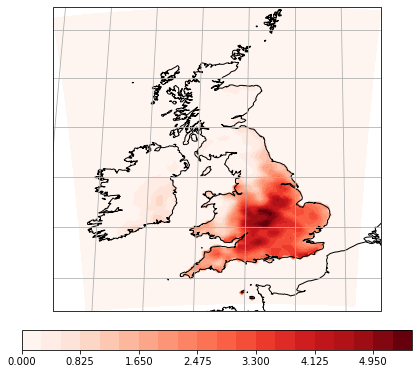

In [42]:
image_array = msr_data[1053,:,:]*mask
image_array = np.nan_to_num(image_array)

cmap = plt.get_cmap('Reds') #define colormap

#define colormap's range and scale
maxes = [np.max(image_array),np.max(image_array),np.max(image_array),np.max(image_array)]
extreme = np.max(maxes) # So that colour scale the same for all plots
cmap_limits = [0,extreme] # So that 0 is the neutral colour
bounds = np.linspace(cmap_limits[0], cmap_limits[1], 21)
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=256)

# Projection:
projection = cartopy.crs.Robinson()
transform=cartopy.crs.OSGB()

# Making axes:
fgr = plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)
ax.coastlines()
ax.gridlines()

# Making the actual figure
fig = ax.contourf(x,y,image_array,levels=bounds, transform=transform,cmap=cmap,norm=norm)

# Alter the color bar for the map
cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,**kw)

##### Making GIF of changing MSR

In [27]:
# Handy function from: 
# https://stackoverflow.com/questions/7821518/matplotlib-save-plot-to-numpy-array
# define a function which returns an image as numpy array from figure
def get_img_from_fig(fgr, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

In [38]:
# Plotting function
def make_plot(msr_data,image_array,x,y):

    cmap = plt.get_cmap('Reds') #define colormap

    #define colormap's range and scale
    extreme = np.max(msr_data)
    cmap_limits = [0,extreme] # So that 0 is the neutral colour
    bounds = np.linspace(cmap_limits[0], cmap_limits[1], 21)
    norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    # Projection:
    projection = cartopy.crs.Robinson()
    transform=cartopy.crs.OSGB()

    # Making axes:
    fgr = plt.figure(figsize=(10,7))
    ax = plt.axes(projection=projection)
    ax.coastlines()
    ax.gridlines()

    # Making the actual figure
    fig = ax.contourf(x,y,image_array,levels=bounds, transform=transform,cmap=cmap,norm=norm)

    # Alter the color bar for the map
    cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
    plt.colorbar(fig,cax=cax,**kw)
    
    return fgr

In [29]:
x = np.array(mask_obj.projection_x_coordinate)
y = np.array(mask_obj.projection_y_coordinate)

/shared/groups/jrole001/geog0121/envs/jupyter_japsy/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  


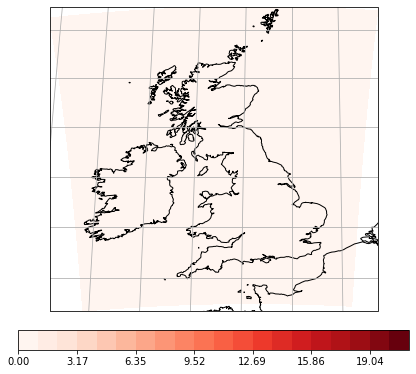

In [65]:
for i in range(1):
    month = 6 # dec = 0, jan =1, feb =2, etc
    image_array = msr_data[i*12 + month,:,:]*mask
    image_array = np.nan_to_num(image_array)
    
    fgr = make_plot(msr_data,image_array,x,y)
    canvas = FigureCanvas(fgr)
    ax = fgr.gca()
    
    canvas.draw()
    buf = canvas.buffer_rgba()
    # convert to a NumPy array
    image = np.asarray(buf)


(504, 720, 4)


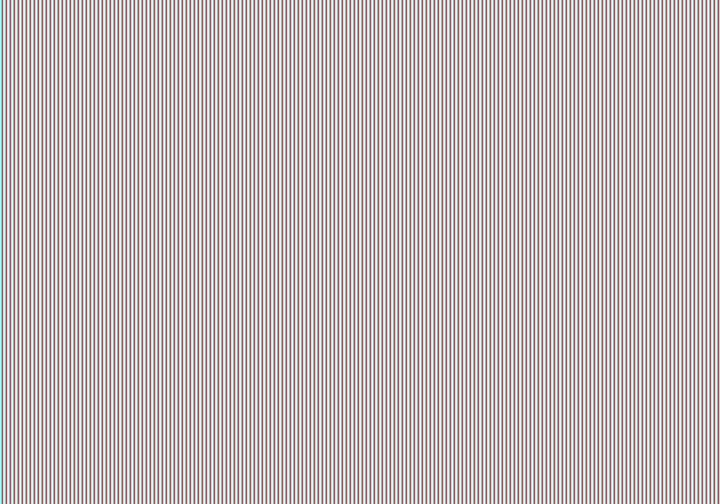

In [63]:
print(image.shape)
from PIL import Image
w, h = 504, 720
img = Image.fromarray(image, 'RGB')
display(img)